In [1]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('/content/ai4i2020.csv')

# Show the first 5 rows
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
# Drop unneeded columns
df = df.drop(columns=['UDI', 'Product ID'])

# Convert 'Type' column (L, M, H) to numbers using label encoding
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})

# Check updated data
df.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Features (X) and Target (y)
X = df.drop(columns=['Machine failure'])  # All except target
y = df['Machine failure']                 # Target column

# Step 2: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

# Show results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



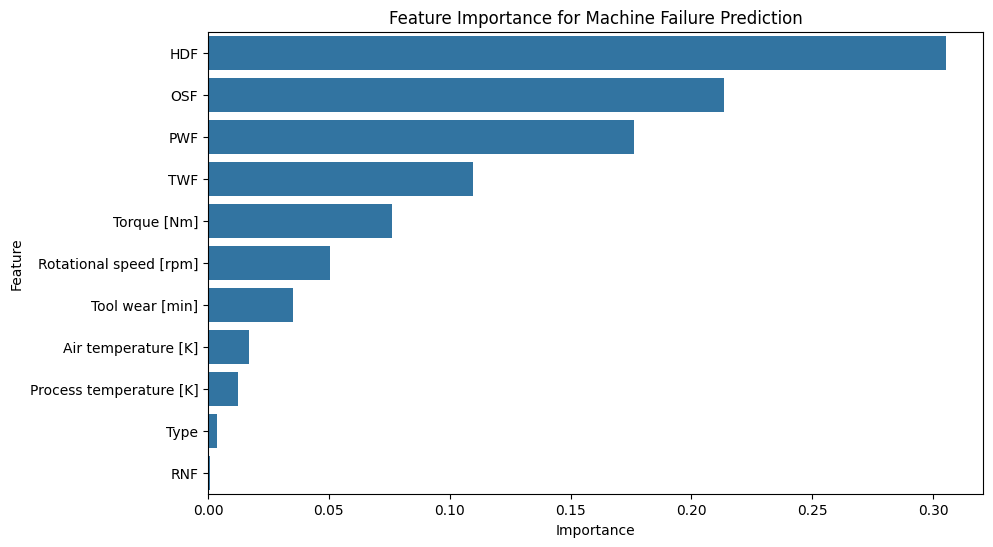

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Machine Failure Prediction")
plt.show()


In [5]:
# Example new input data: [Type, AirTemp, ProcessTemp, RotSpeed, Torque, ToolWear, TWF, HDF, PWF, OSF, RNF]
new_data = [[2, 310, 320, 1500, 42, 220, 0, 0, 0, 0, 0]]  # Example values

# Predict using the trained model
prediction = model.predict(new_data)

# Show result
if prediction[0] == 1:
    print("⚠️ Prediction: Machine is likely to FAIL!")
else:
    print("✅ Prediction: Machine is NOT likely to fail.")


✅ Prediction: Machine is NOT likely to fail.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
# Add predictions to the original data
df['Predicted Failure'] = model.predict(X)

# Save to CSV file
df.to_csv('predicted_machine_failures.csv', index=False)

print("✅ Done! Your results are saved in predicted_machine_failures.csv 🎉")


✅ Done! Your results are saved in predicted_machine_failures.csv 🎉


In [7]:
from google.colab import files
files.download('predicted_machine_failures.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>